# Lab: Classification with Decision Trees

**Objectives of the practical work:**

1. Learn how to build decision trees with scikit-learn  
2. Be familiar with some parameters and visualization tools
3. Use a real-case dataset (COMPASS ) as an example
4. Evaluate diverse trees in terms of training and testing accuracies with different parameters
5. Study the impact of some parameters on the sensitivity aspect




## PART 1: Basic steps 

The following are basic instructions to start with decision trees. You need to execute them one by one to understand the basic steps for learning decision trees. Once you get familiar with the different steps, you will be working on the compass dataset. 

The decision tree package that we use is from scikit-learn. The full documentation of decision trees are available at https://scikit-learn.org/stable/modules/tree.html

Take a moment to briefly consult the documentation.

We need first to include some libraries: 




In [35]:
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees 

The following is a basic example for binary classification



In [36]:
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]

We construct a decision tree using the default parameters:

In [37]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Now we can ask the decision tree to predict the outcome for unknown examples. 
For instance we can ask a prediction for the three examples:

In [38]:
clf.predict([[1,1,1,1],[0,1,0,0],[1,1,0,1]])
# clf.predict([[0, 0, 1, 0]])
# clf.predict([[0, 1, 0, 1]])
# clf.predict([[1, 1, 0, 0]])

array([1, 1, 0])

The result is an array of the 3 predicted labels (one for each example): `array([0, 1, 0])`

## PART 2 : Visualization 

There are many ways to visualize a decision tree. The first one is very basic:



In [39]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1



We can use a more readable and visual way as follows:

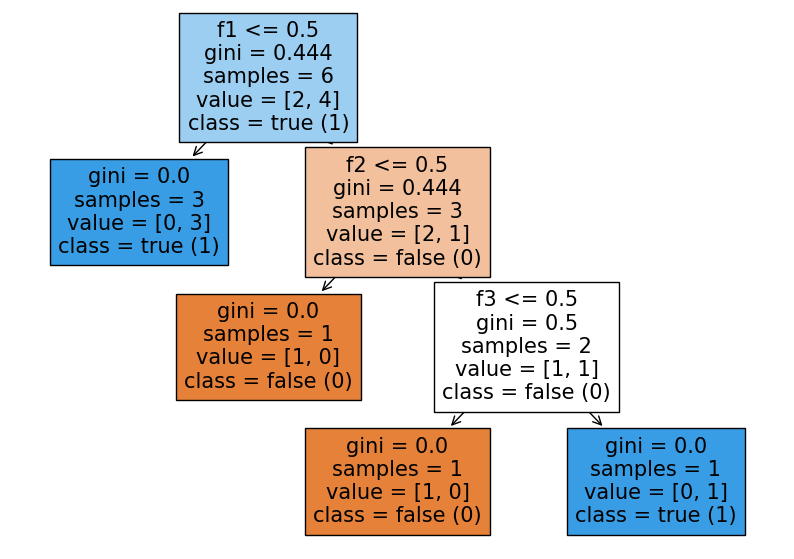

In [40]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                    feature_names= ("f1","f2" , "f3", "f4"),
                    class_names= ("false (0)", "true (1)" ), 
                    filled=True)


Where:
- `figsize` restrains the size of the plot,
- `feature_names` gives the names of the different features,
- `class_names` corresponds to human readable labels for each class,
- `filled` is a boolean indicating a preference to show a colorful tree. 


**Tasks:**
- Construct manually a new binary dataset (larger than the one above), associate some labels then study the tree built by default (similar to above). Give some fancy names to the binary features and classes for a visual interpretation. 


|--- feature_6 <= 0.50
|   |--- class: 0
|--- feature_6 >  0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.50
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  0.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_7 >  0.50
|   |   |   |--- class: 0
|   |--- feature_4 >  0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 1



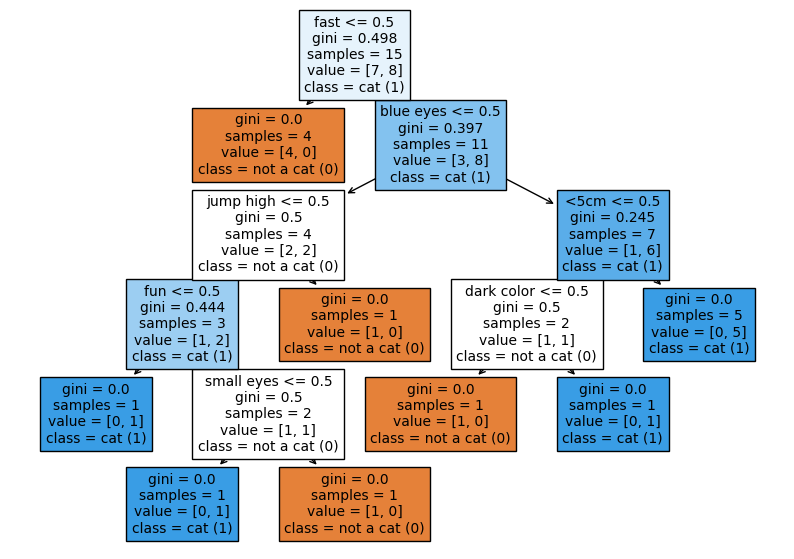

In [41]:
# Construct manually a new binary dataset, associate some labels then study the tree built by default (similar to above)

# Path: tp3/Sujet_DT.ipynb
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees

# X is the training set
# Each example in X has 4 binary features

X = [
     [1, 0, 1, 0, 1, 1, 1, 1], [1, 0, 0, 1, 0, 1, 1, 0], [0, 0, 1, 0, 0, 0, 0, 1],
     [0, 1, 1, 1, 1, 1, 0, 0], [0, 1, 0, 1, 1, 1, 1, 0], [0, 0, 1, 0, 0, 0, 1, 0],
     [1, 0, 0, 0, 1, 1, 1, 1], [1, 0, 1, 1, 0, 1, 1, 0], [0, 0, 1, 0, 0, 0, 1, 1],
     [1, 0, 1, 0, 1, 1, 1, 0], [0, 0, 0, 1, 1, 1, 1, 0], [0, 0, 1, 0, 1, 1, 0, 0],
     [1, 0, 1, 0, 1, 0, 1, 1], [1, 0, 0, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 1, 0, 1]
     ]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [
    1, 1, 0, 
     0, 1, 1, 
     1, 0, 0, 
     1, 0, 0,
     1, 1, 0
    ]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

clf.predict([ [1,1,1,1,1,1,1,1] ])
text_representation = tree.export_text(clf)
print(text_representation)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                    feature_names= ("<5cm","dark color","small eyes","bold",'blue eyes','fun','fast','jump high'),
                    class_names= ("not a cat (0)", "cat (1)" ), 
                    filled=True)


## PART 3: The compass dataset

We study here the COMPASS dataset as a case study. Recall that it has been used in a legislative context for predicting recidivism in the U.S. That is, the tendency of a convicted criminal to re-offend


Have a look at the original non-binary dataset ([https://www.kaggle.com/danofer/compass](https://www.kaggle.com/danofer/compass)) to understand the different features. Consider in particular the data used for fairness: propublicaCompassRecividism_data_fairml.csv


**Understanding the dataset:**

Take a moment to think about the following questions 

- What are the features? 
- How many examples in the dataset?
- What are your expectations regarding the most important features? 
- Propose (informally) a way to reduce the dataset
- There many ways to binarize the dataset. How do you propose to do so?



Below, we use a binarized version of the dataset that is used in the FairCORELS library (https://github.com/ferryjul/fairCORELS) as well some of its tools. 

You need first to download the dataset and the tools file and put them in your work directory:

- The dataset compass.csv
- The set of tools utils.py

Load the binary dataset `compass.csv` as follows 

In [42]:
import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

# What are the features ?
print(features)

# How many examples in the dataset ?
print("There are {} examples in the dataset".format(len(train_examples)))

# What are your expectations regarding the most important features ?
# Peut-être l'âge, le fait que ce soit un homme etc...

# Propose (informally) a way to reduce the dataset 
# (i.e. to remove some examples and/or some features)
# 25% test and 75% train

# There are many ways to binarize the dataset. How do you propose to do so ?
# On peut binariser les features en fonction de leur valeur, par exemple pour l'âge, on peut dire que si l'âge est supérieur à 40 ans, alors on met 1, sinon 0



['race_African-American', 'race_Caucasian', 'gender_Female', 'gender_Male', 'age_18-20', 'age_21-22', 'age_23-25', 'age_26-45', 'age_>45', 'juvenile-felonies_=0', 'juvenile-felonies_>0', 'juvenile-misdemeanors_=0', 'juvenile-misdemeanors_>0', 'juvenile-crimes_=0', 'juvenile-crimes_>0', 'priors_0', 'priors_1', 'priors_2-3', 'priors_>3', 'charge_degree_Misdemeanor', 'charge_degree_Felony', 'not_gender_Female', 'not_gender_Male', 'not_age_18-20', 'not_age_21-22', 'not_age_23-25', 'not_age_26-45', 'not_age_>45', 'not_juvenile-felonies_=0', 'not_juvenile-felonies_>0', 'not_juvenile-misdemeanors_=0', 'not_juvenile-misdemeanors_>0', 'not_juvenile-crimes_=0', 'not_juvenile-crimes_>0', 'not_priors_0', 'not_priors_1', 'not_priors_2-3', 'not_priors_>3', 'not_charge_degree_Misdemeanor', 'not_charge_degree_Felony', 'juvenile-misdemeanors_=0__AND__juvenile-felonies_=0', 'gender_Male__AND__juvenile-felonies_=0', 'gender_Male__AND__juvenile-misdemeanors_=0', 'gender_Male__AND__juvenile-crimes_=0', 'ju

Inspect each of these 4 objects. What do they represent? How many features? examples? 


In [43]:
train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

#Inspect each of these 4 objects. What do they contain ?
# >> train_examples : les exemples d'entrainement
# >> train_labels : les labels associés aux exemples d'entrainement
# >> features : les features
# >> prediction : la prédiction (two_year_recid or not)


# How many features ?
print("There are {} features".format(len(features)))

# How many examples ?
print("There are {} examples".format(len(train_examples)))

There are 165 features
There are 5273 examples


Have a look at the different parameters of the `DecisionTreeClassifier` class constructor. We will be studying three parameters: 

- splitter
- max_depth 
- min_samples_leaf 

What do they represent? 

In [44]:
# What represent splitter parameter in DecisionTreeClassifier ?
# >> The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

# What represent max-depth parameter in DecisionTreeClassifier ?
# >> The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

# What represent min_samples_split parameter in DecisionTreeClassifier ?
# >> The minimum number of samples required to split an internal node

**Tasks:**

- 1:  Build severals decision trees (different parameters) and visualize them
- 2: Run a solid evaluation on different trees (with different parameters) by randomly splitting the data 80% for training and 20% for test *multiple times*.
- 3: Do again the evaluation using 5-cross-validation
- 4: Evaluate the impact (in terms of accuracy) of the three parameters : maximum depth, splitting criterion, and the minimum sample leafs. 
- 5: Study the confusion matrix to evaluate the True/False Positive/Negative Rate. What are the most important parameters? 
- 6: Propose a way to assess whether the algorithm is fair to a particular ethnic group.

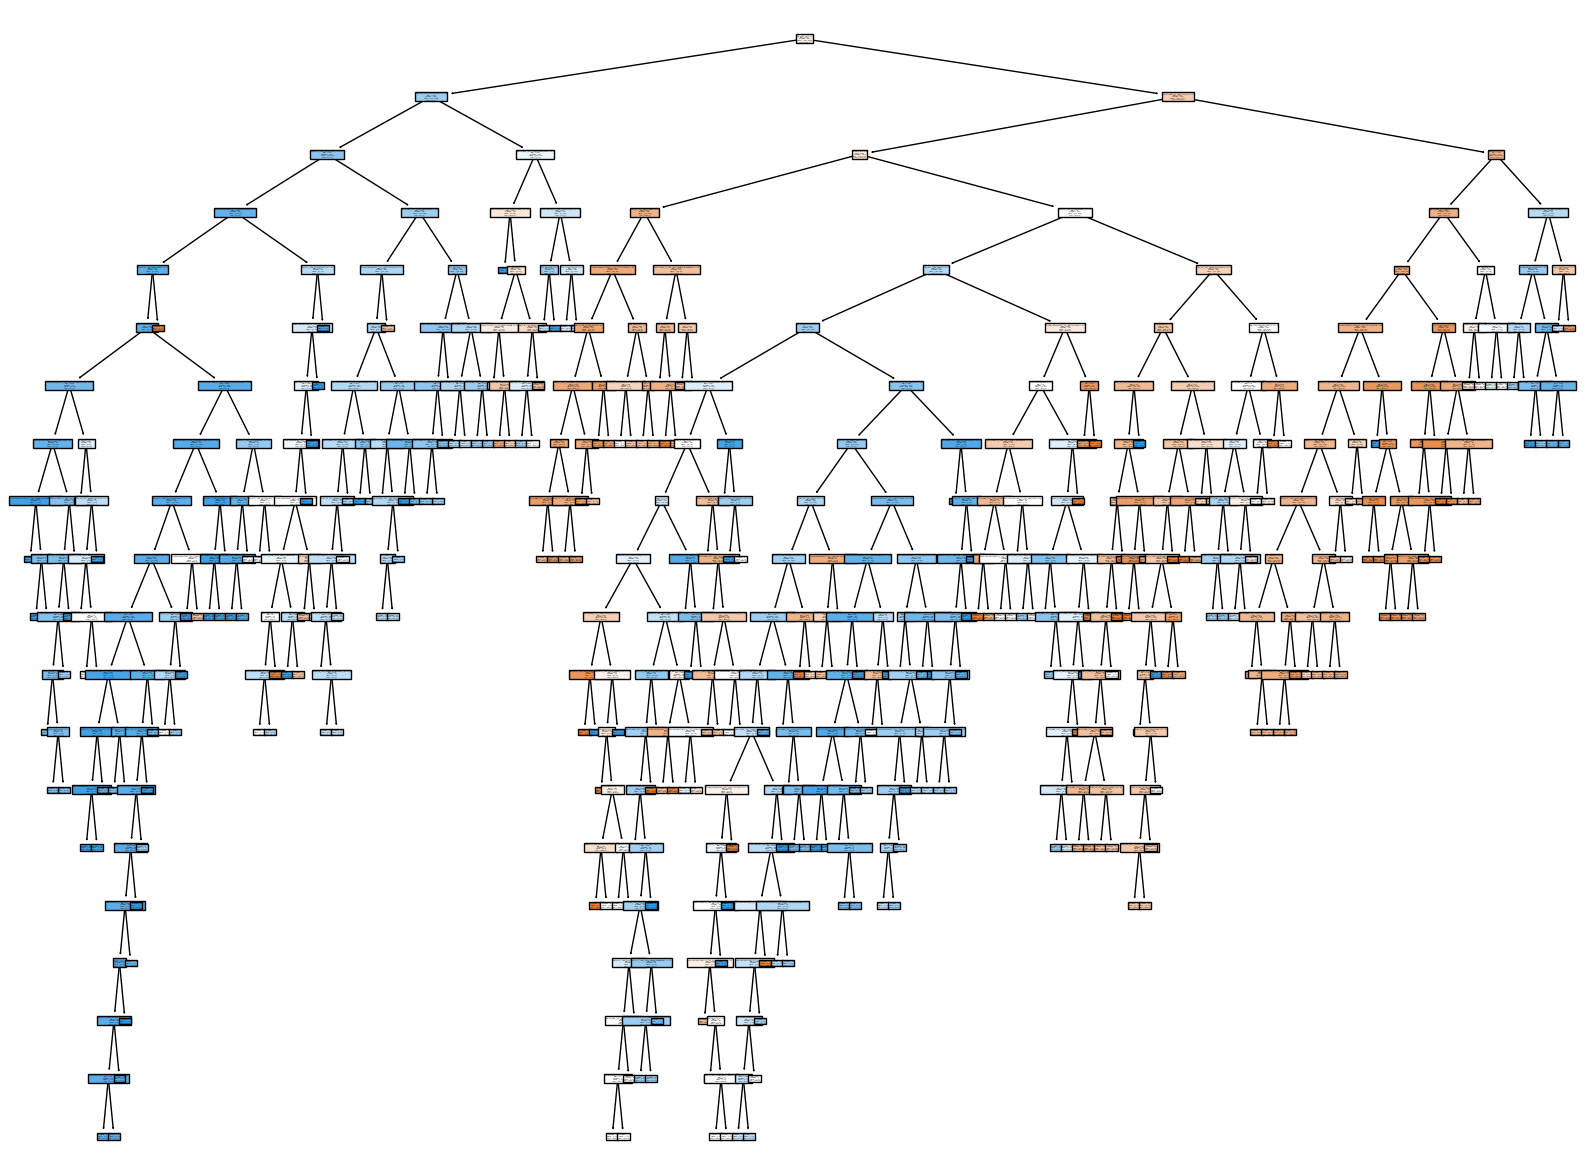

In [45]:
# Build the biggest decision tree

from sklearn import tree
from matplotlib import pyplot as plt 

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_examples, train_labels)

fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(clf,
                    feature_names= features,
                    class_names= ("false (0)", "true (1)" ),
                    filled=True)


max_depth
	 8
	 13
	 20
min_samples_leaf
	 1
	 20
splitter
	 best
	 random
max_depth :  8 , min_samples_leaf :  1 , splitter :  best


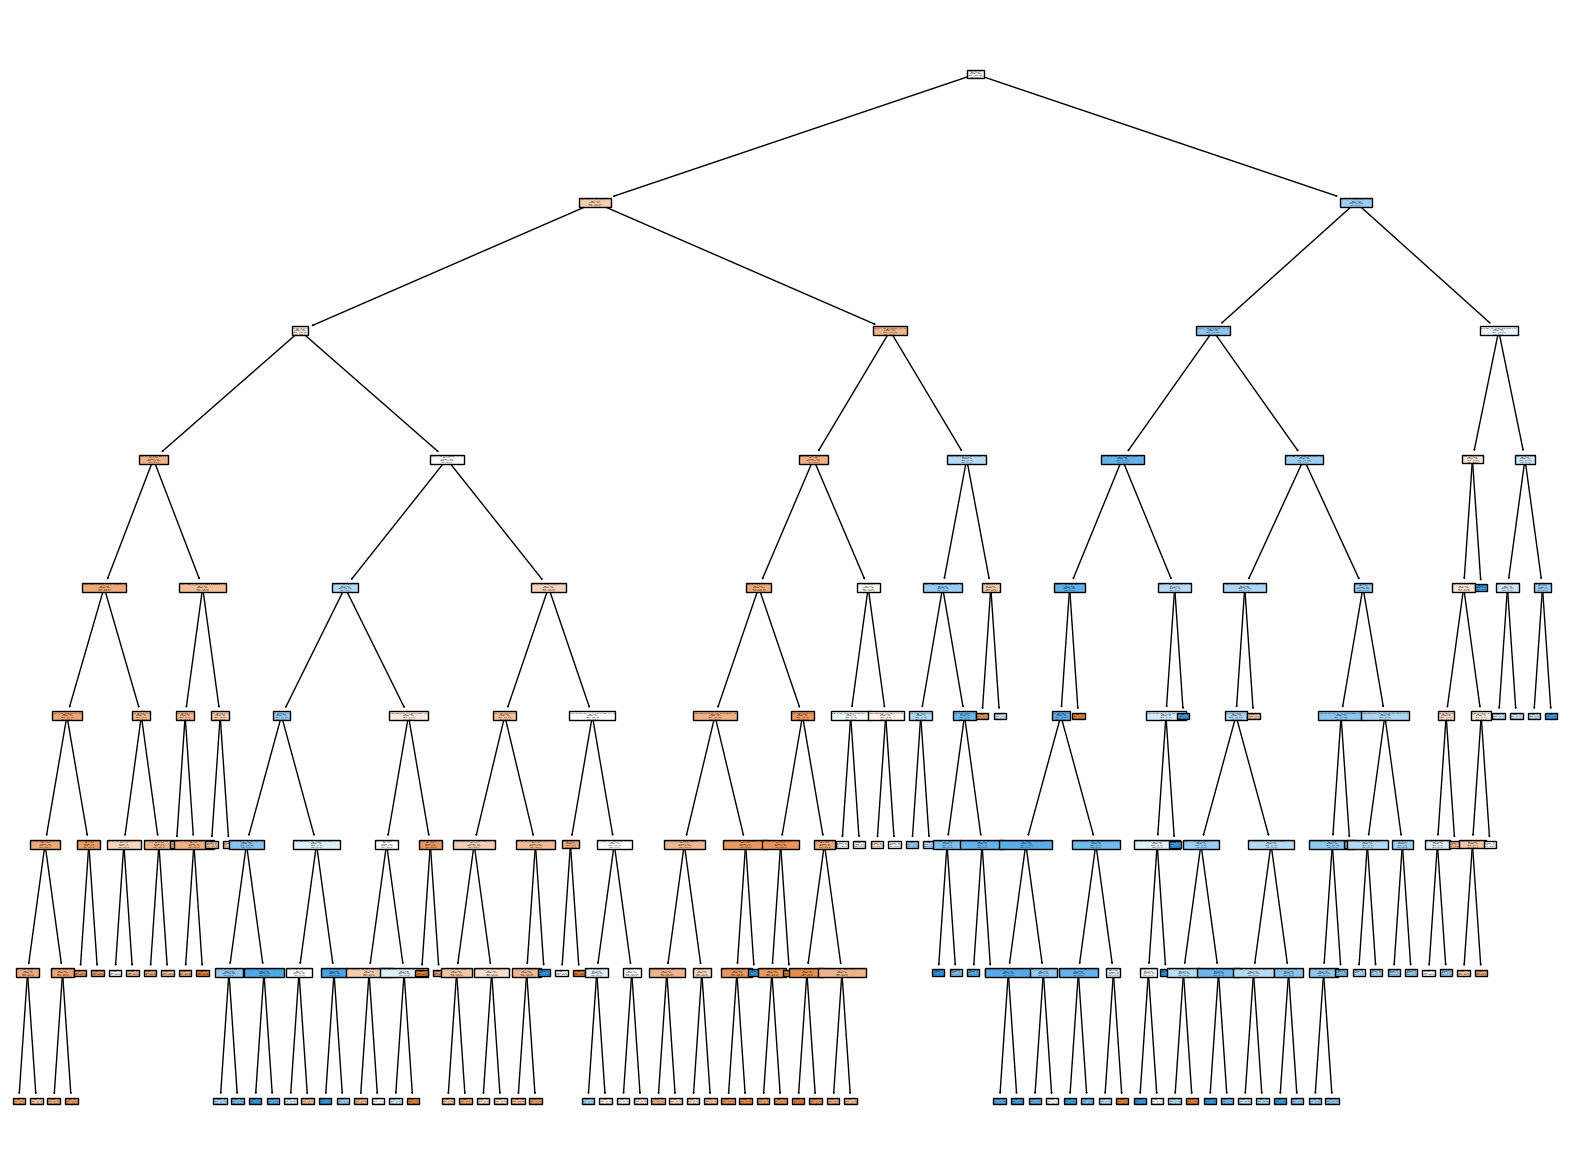

max_depth :  8 , min_samples_leaf :  1 , splitter :  random


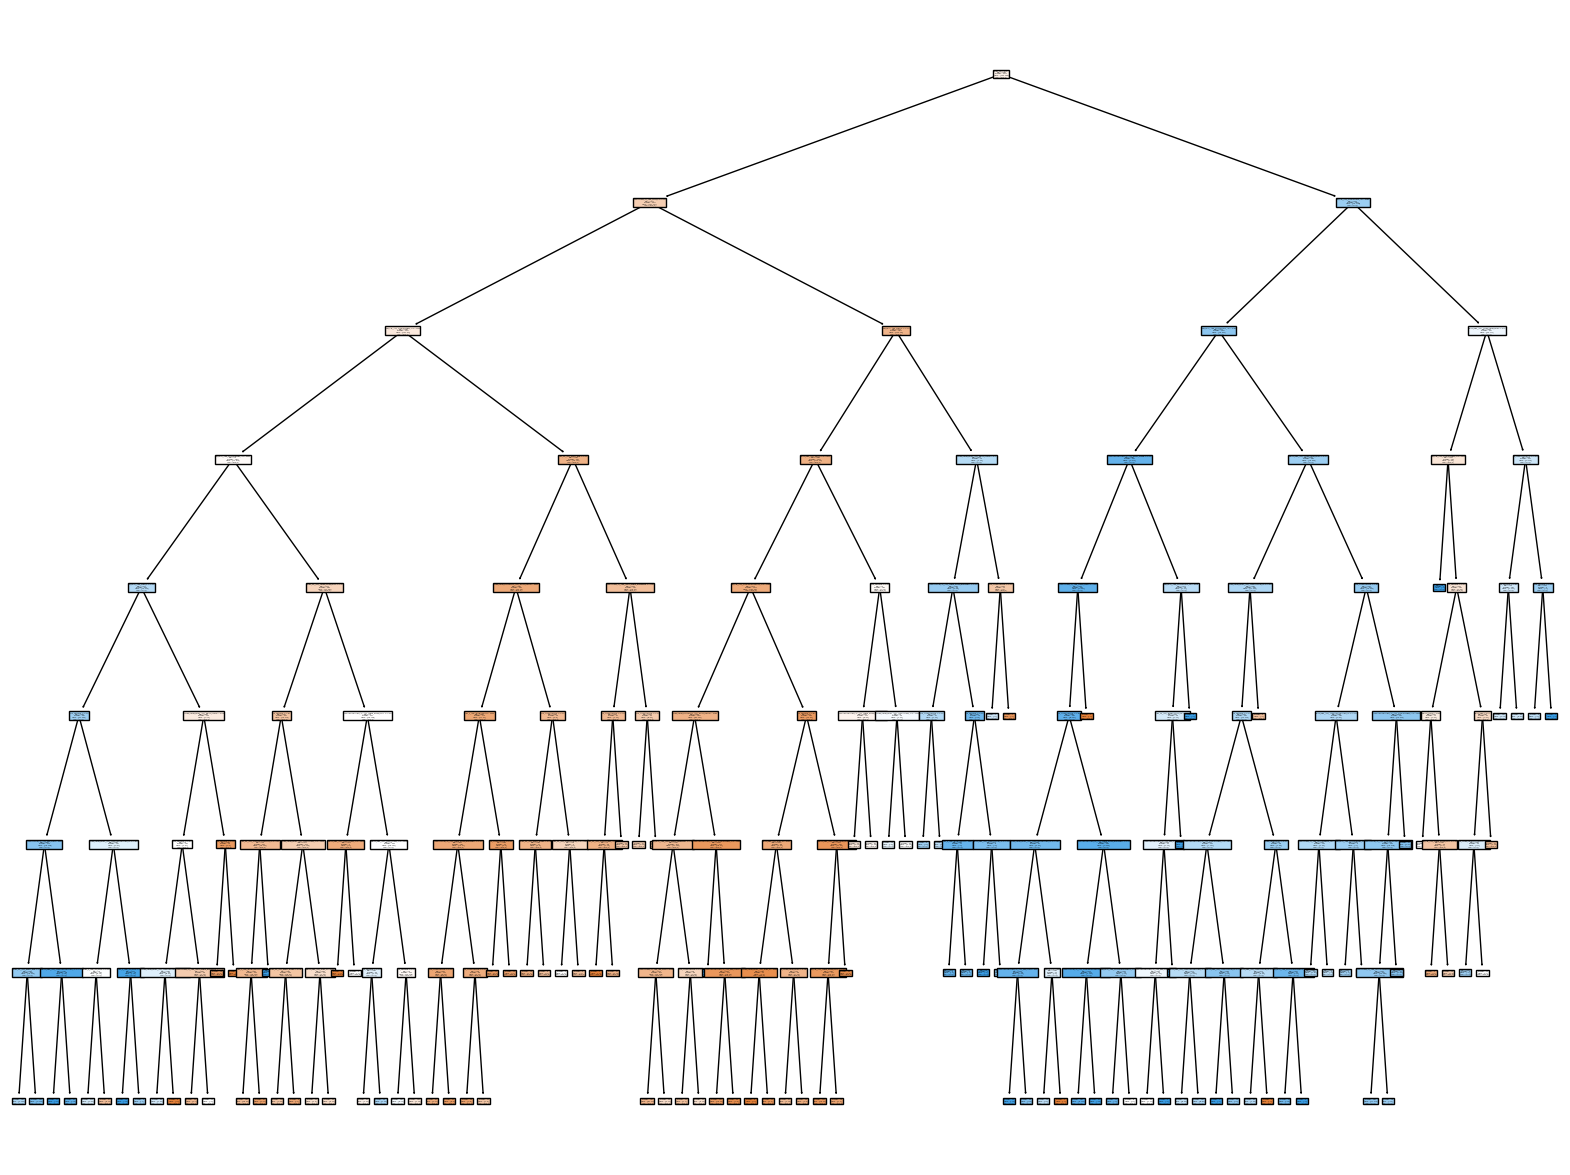

max_depth :  8 , min_samples_leaf :  20 , splitter :  best


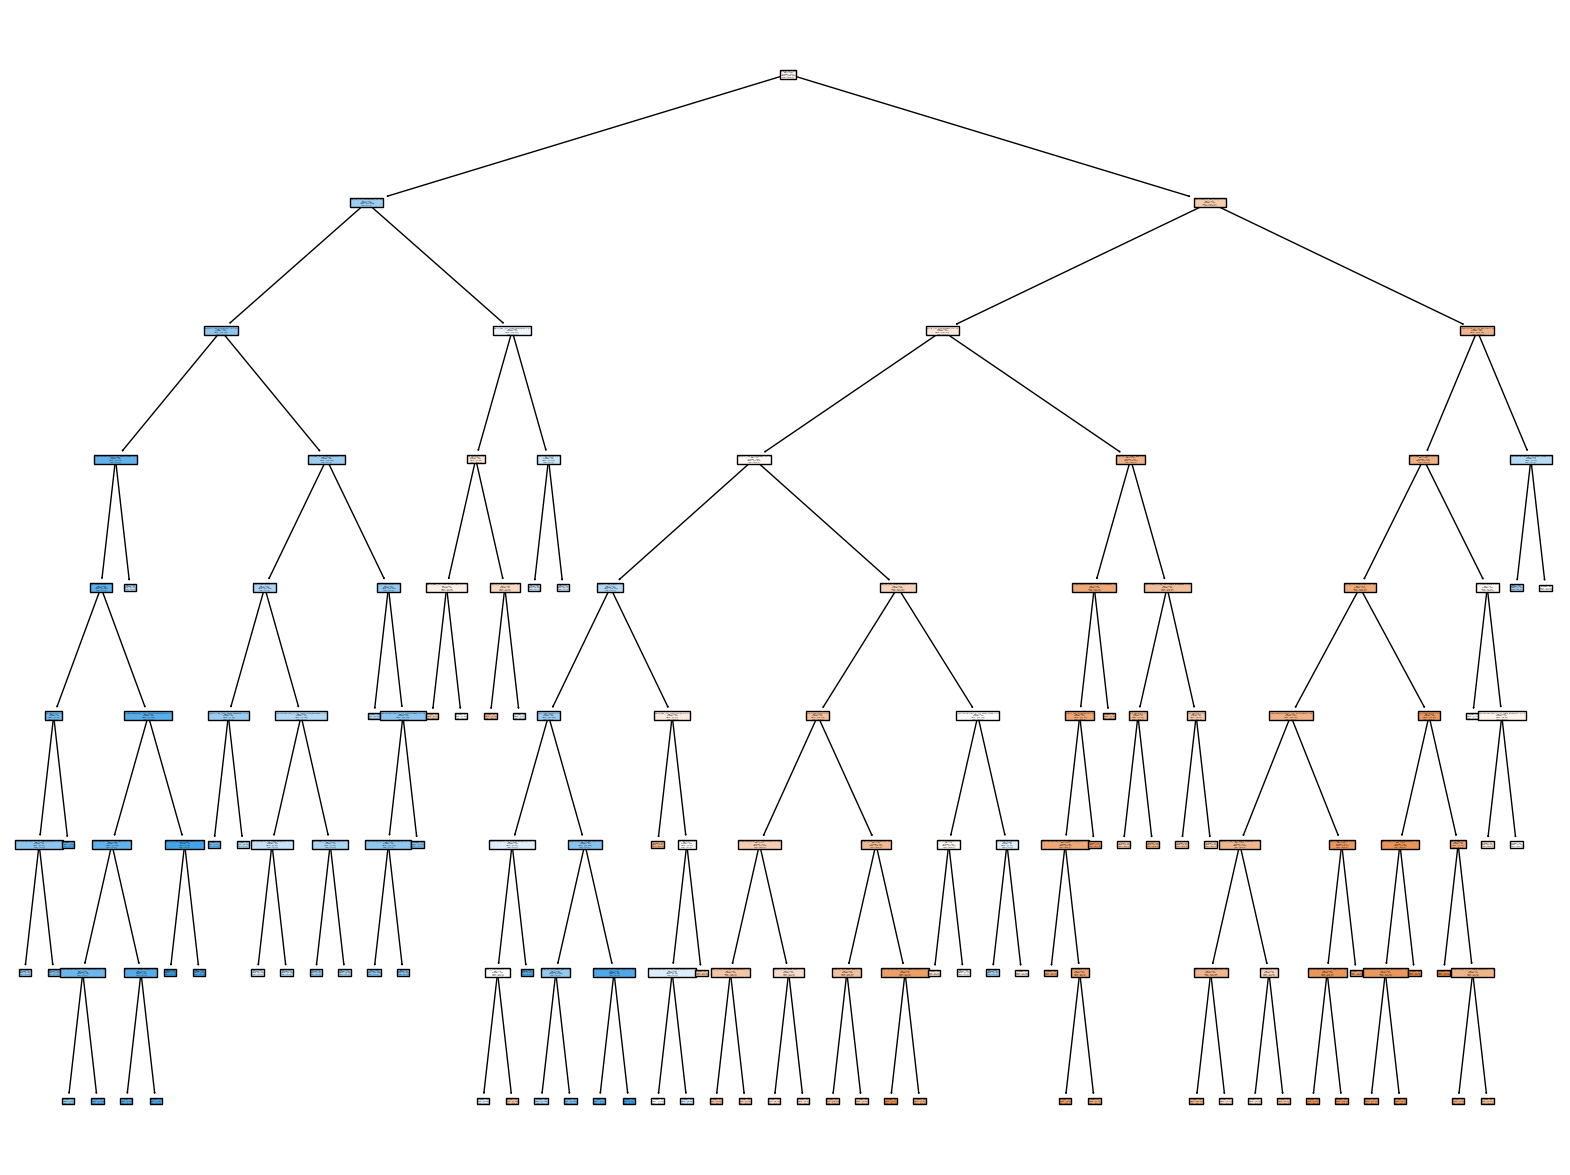

max_depth :  8 , min_samples_leaf :  20 , splitter :  random


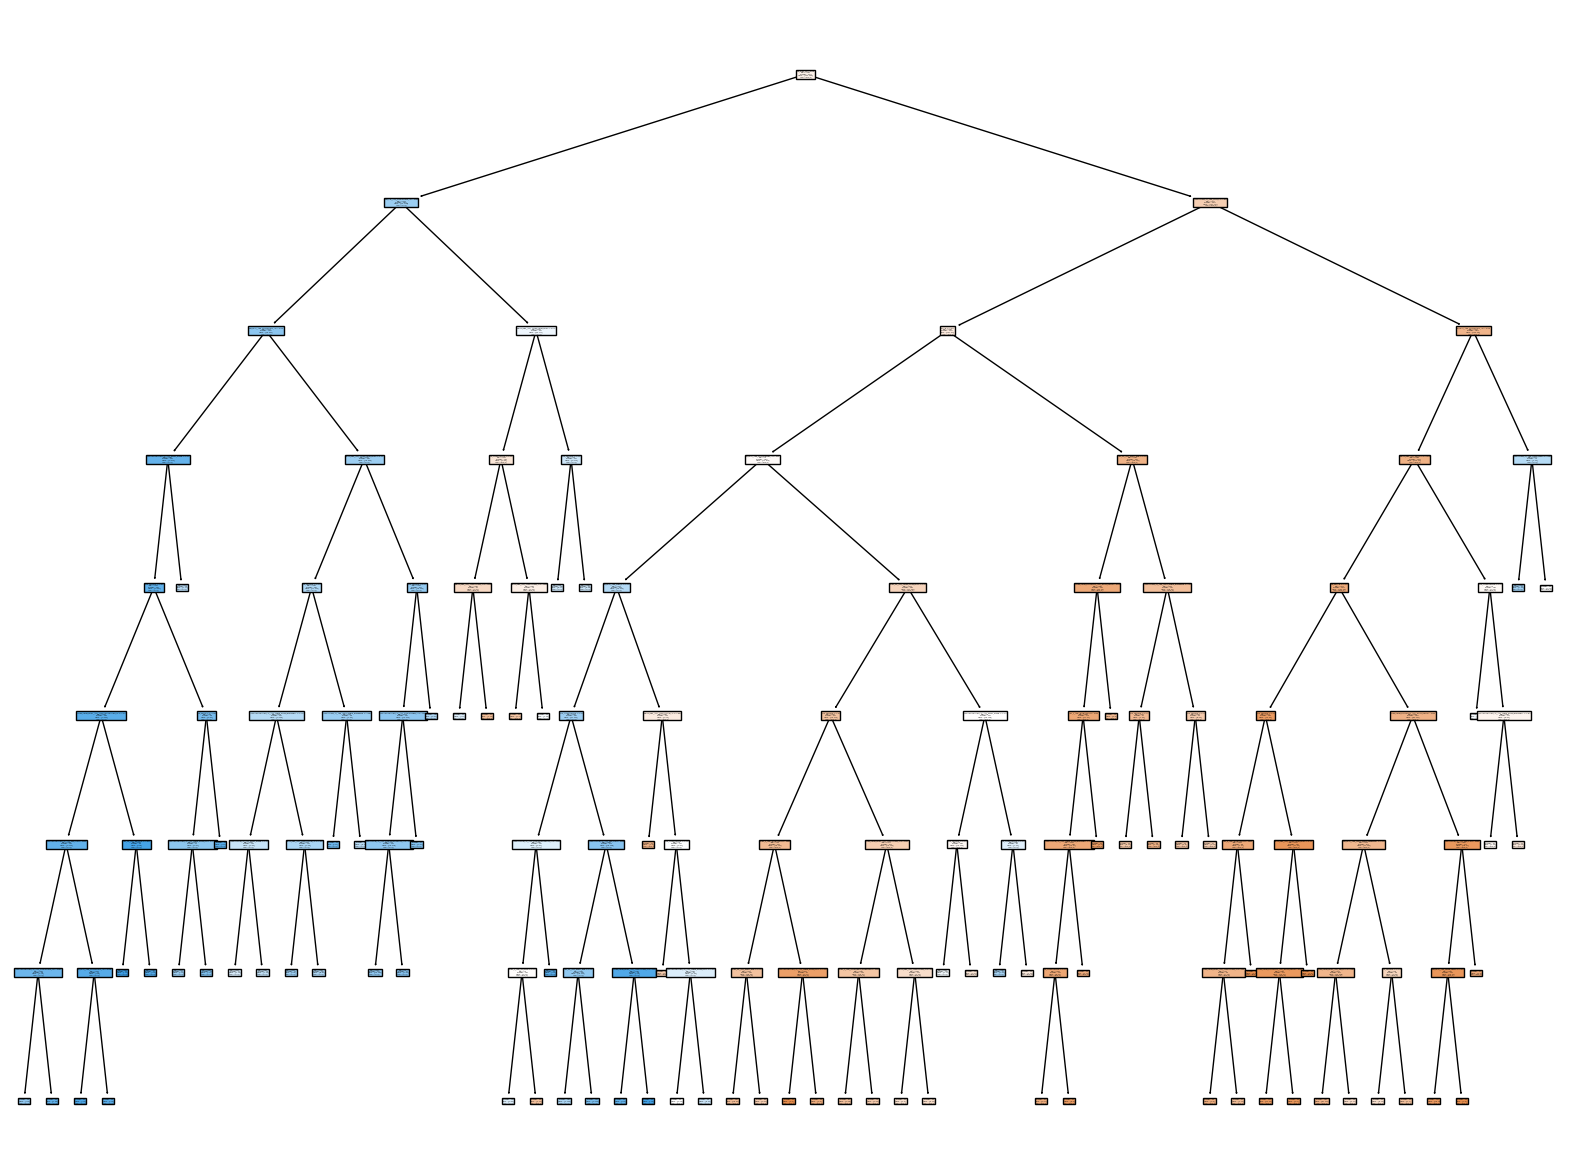

max_depth :  13 , min_samples_leaf :  1 , splitter :  best


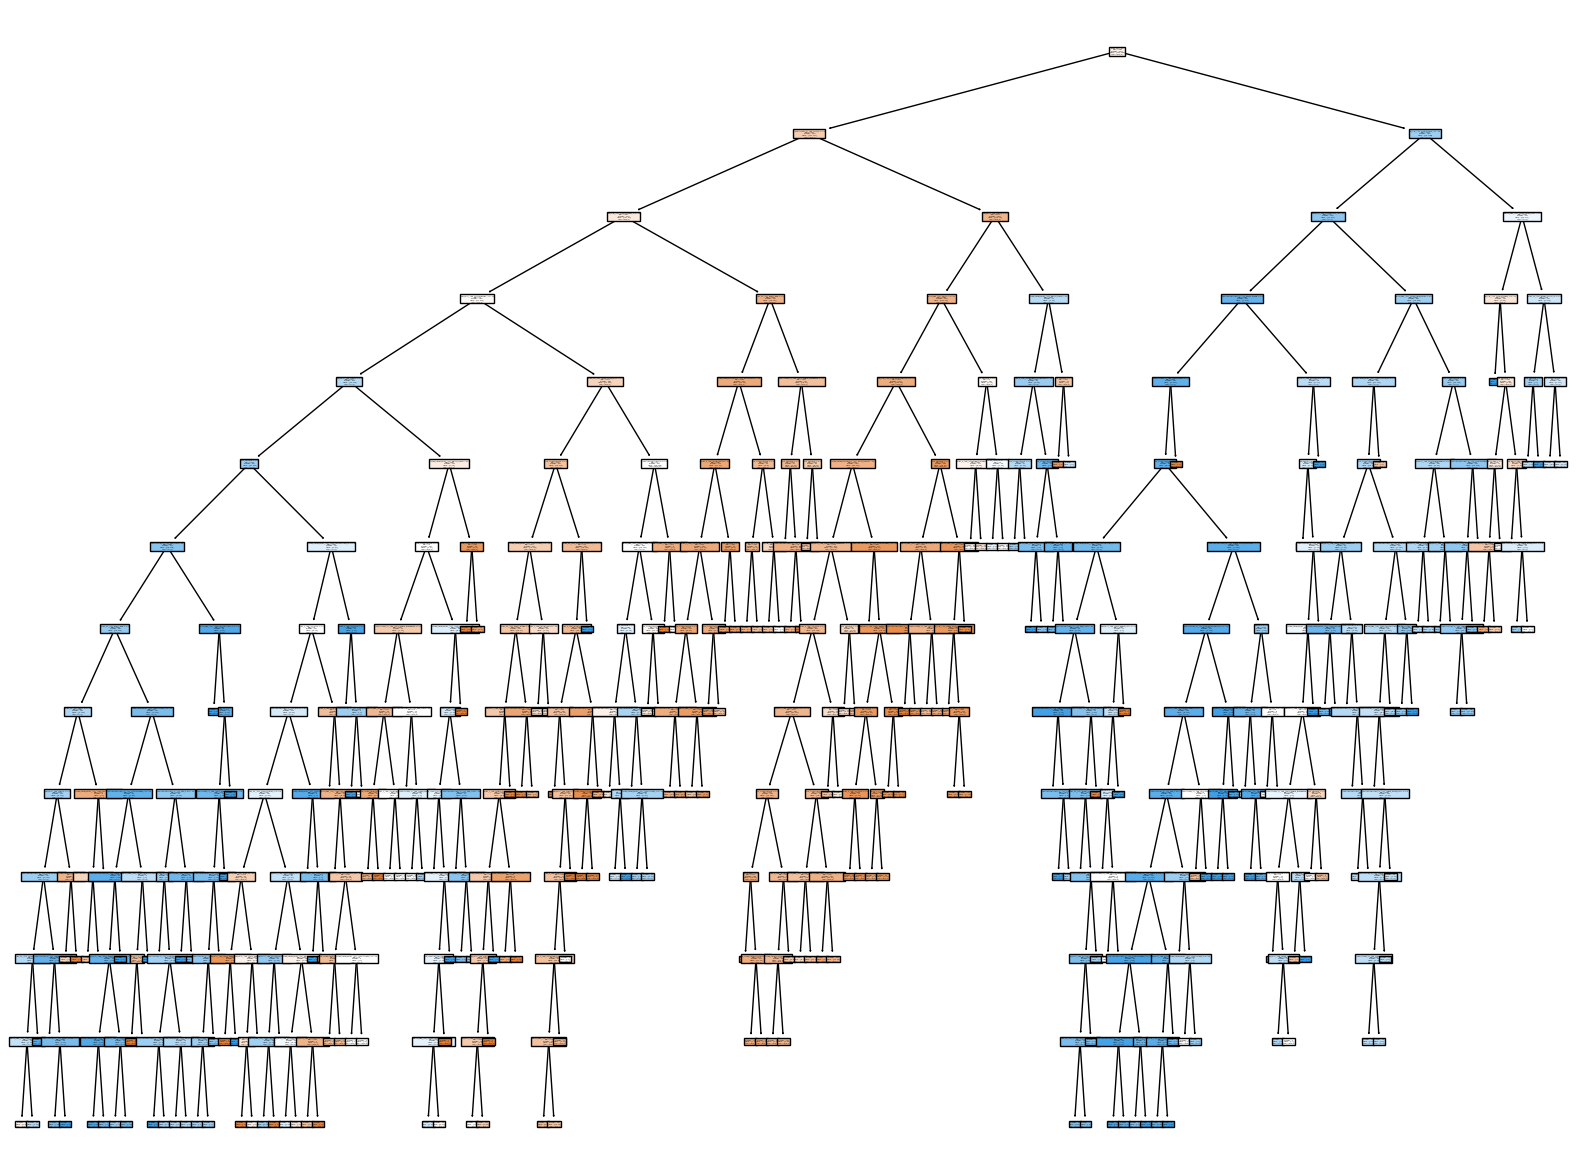

max_depth :  13 , min_samples_leaf :  1 , splitter :  random


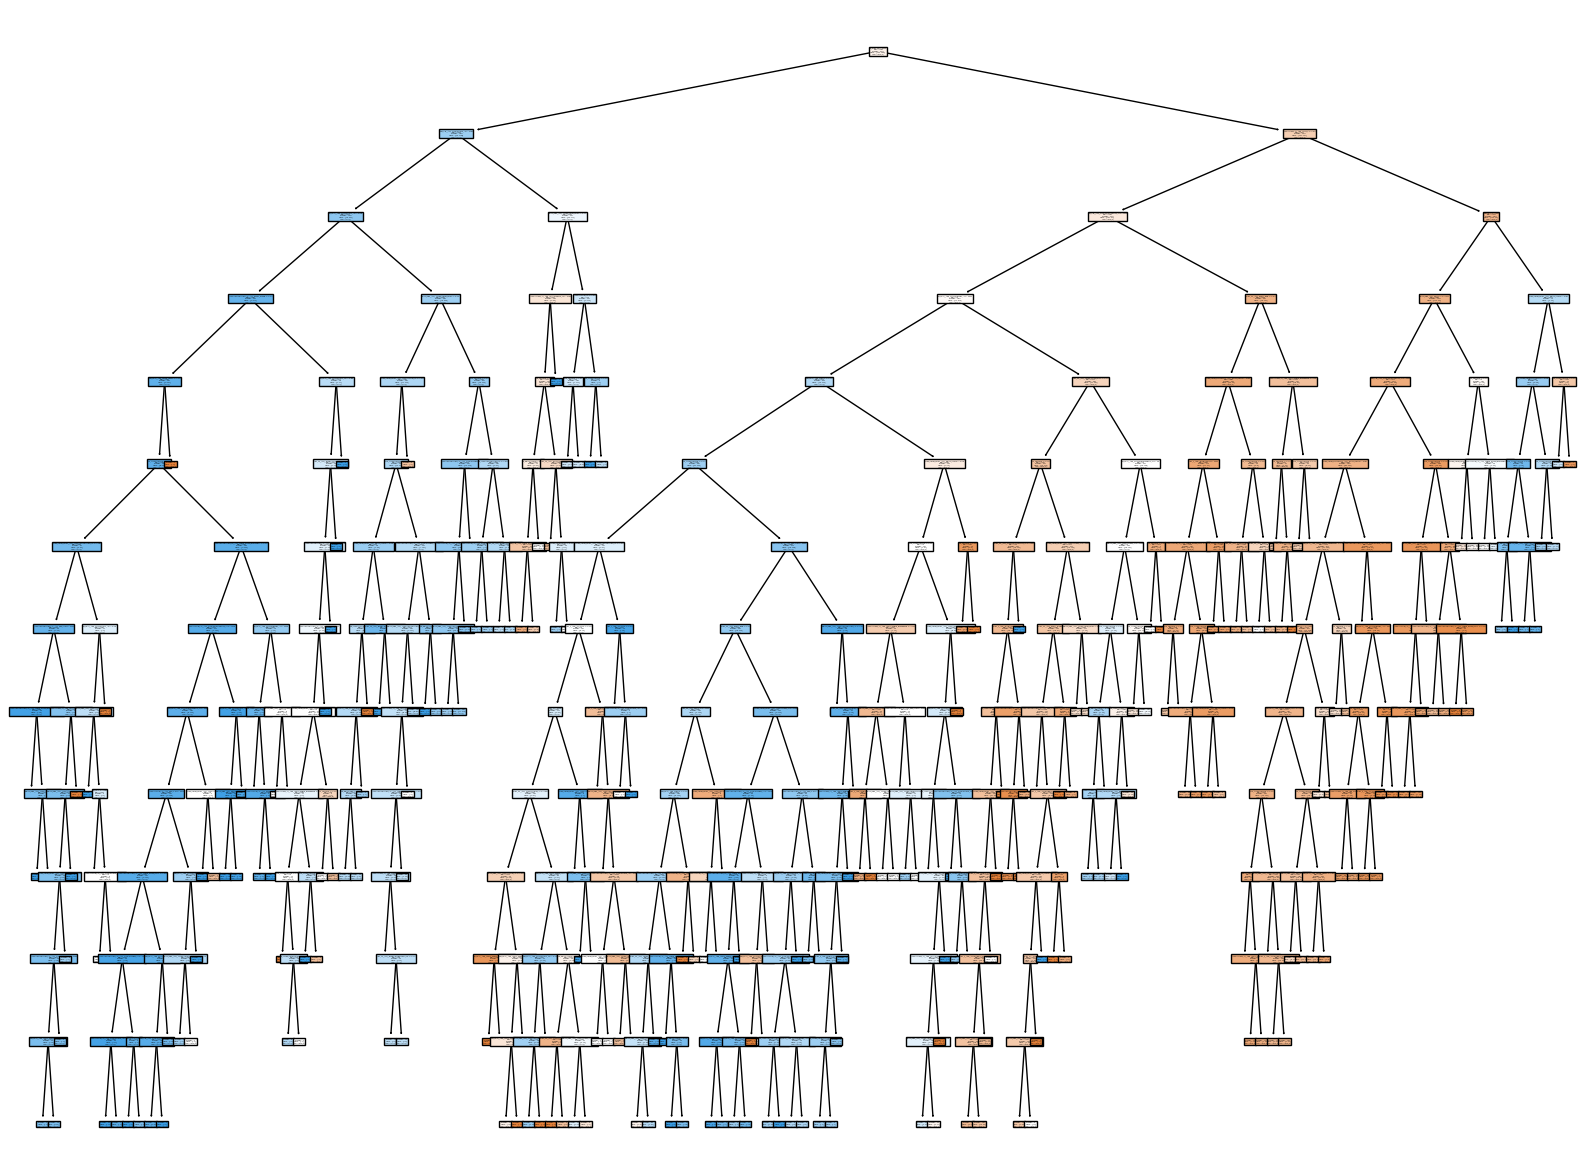

max_depth :  13 , min_samples_leaf :  20 , splitter :  best


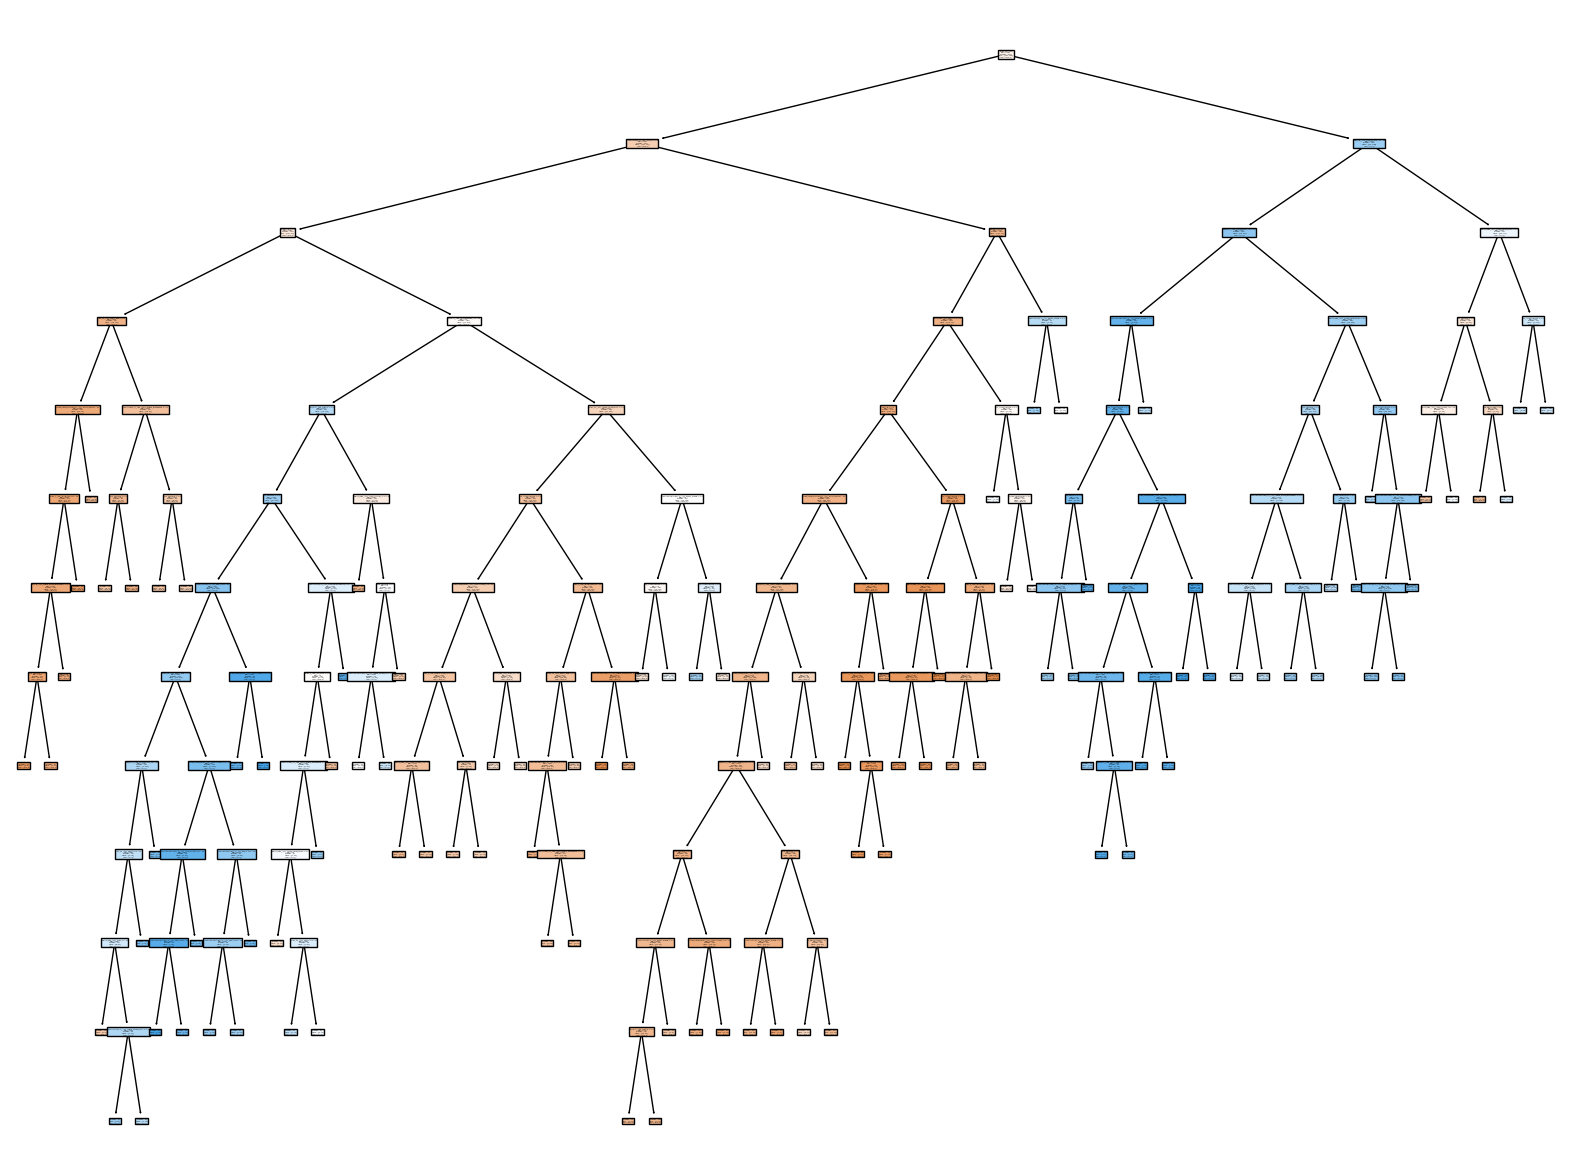

max_depth :  13 , min_samples_leaf :  20 , splitter :  random


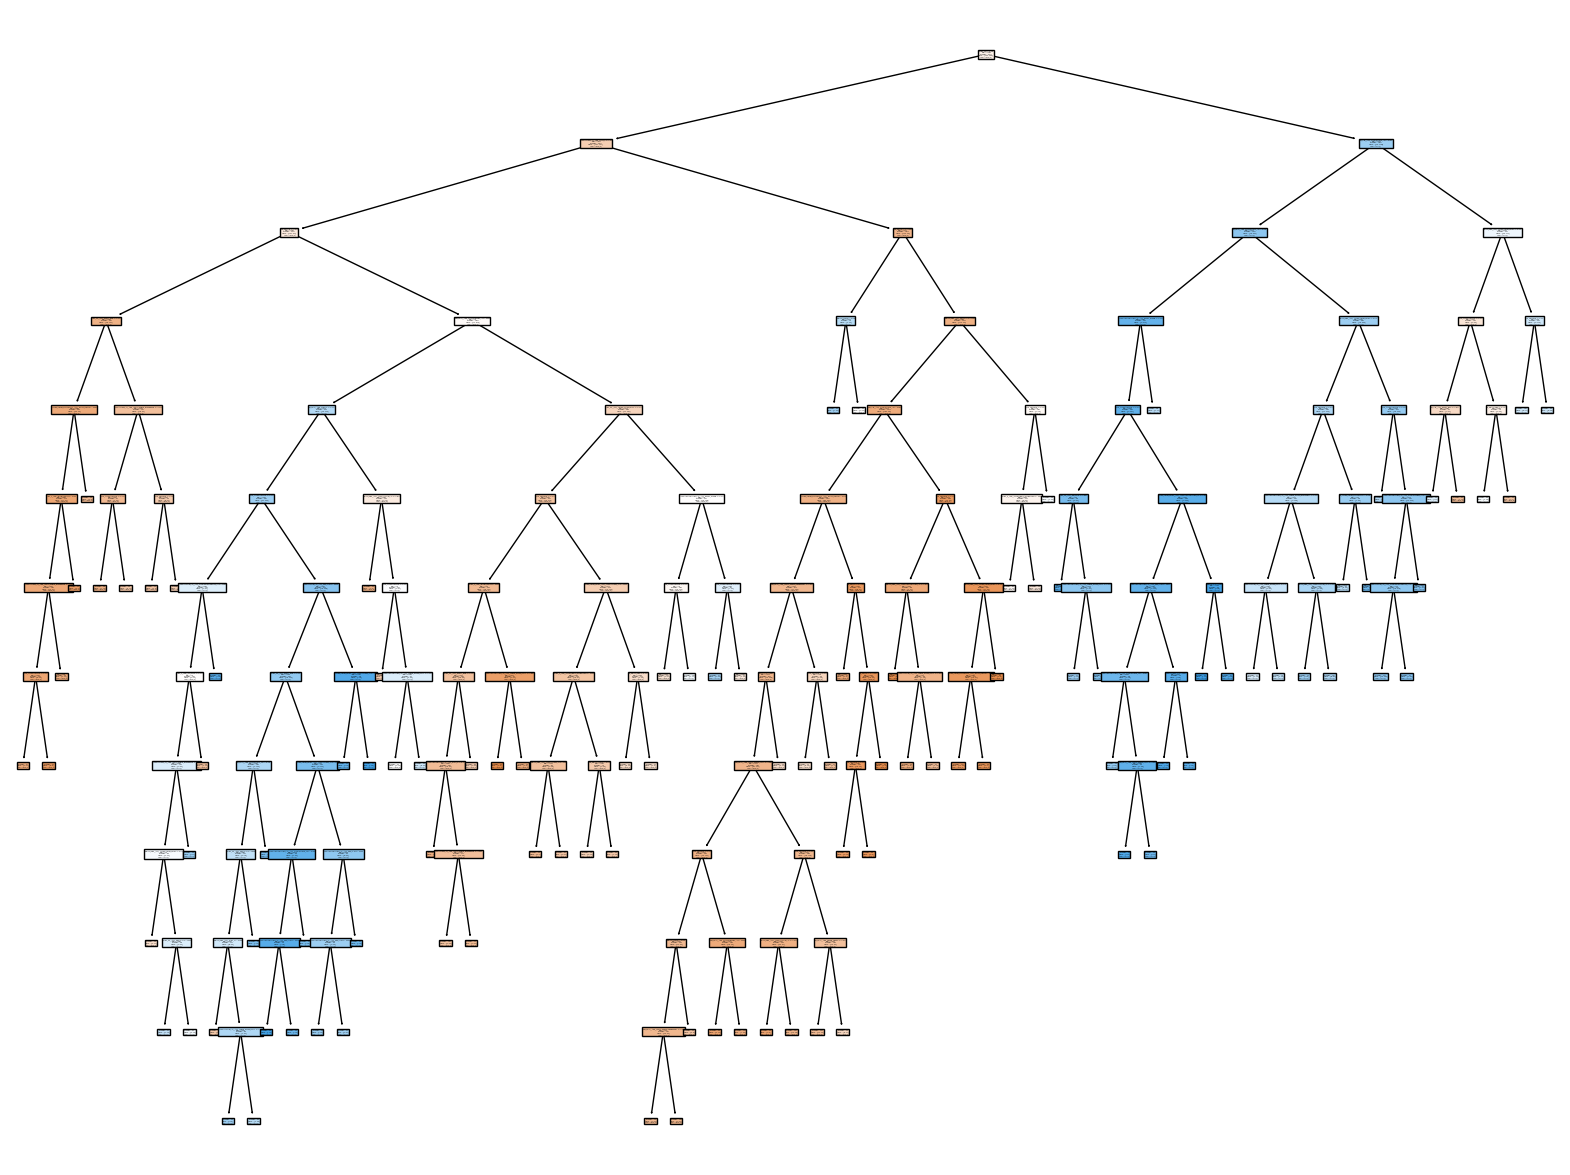

max_depth :  20 , min_samples_leaf :  1 , splitter :  best


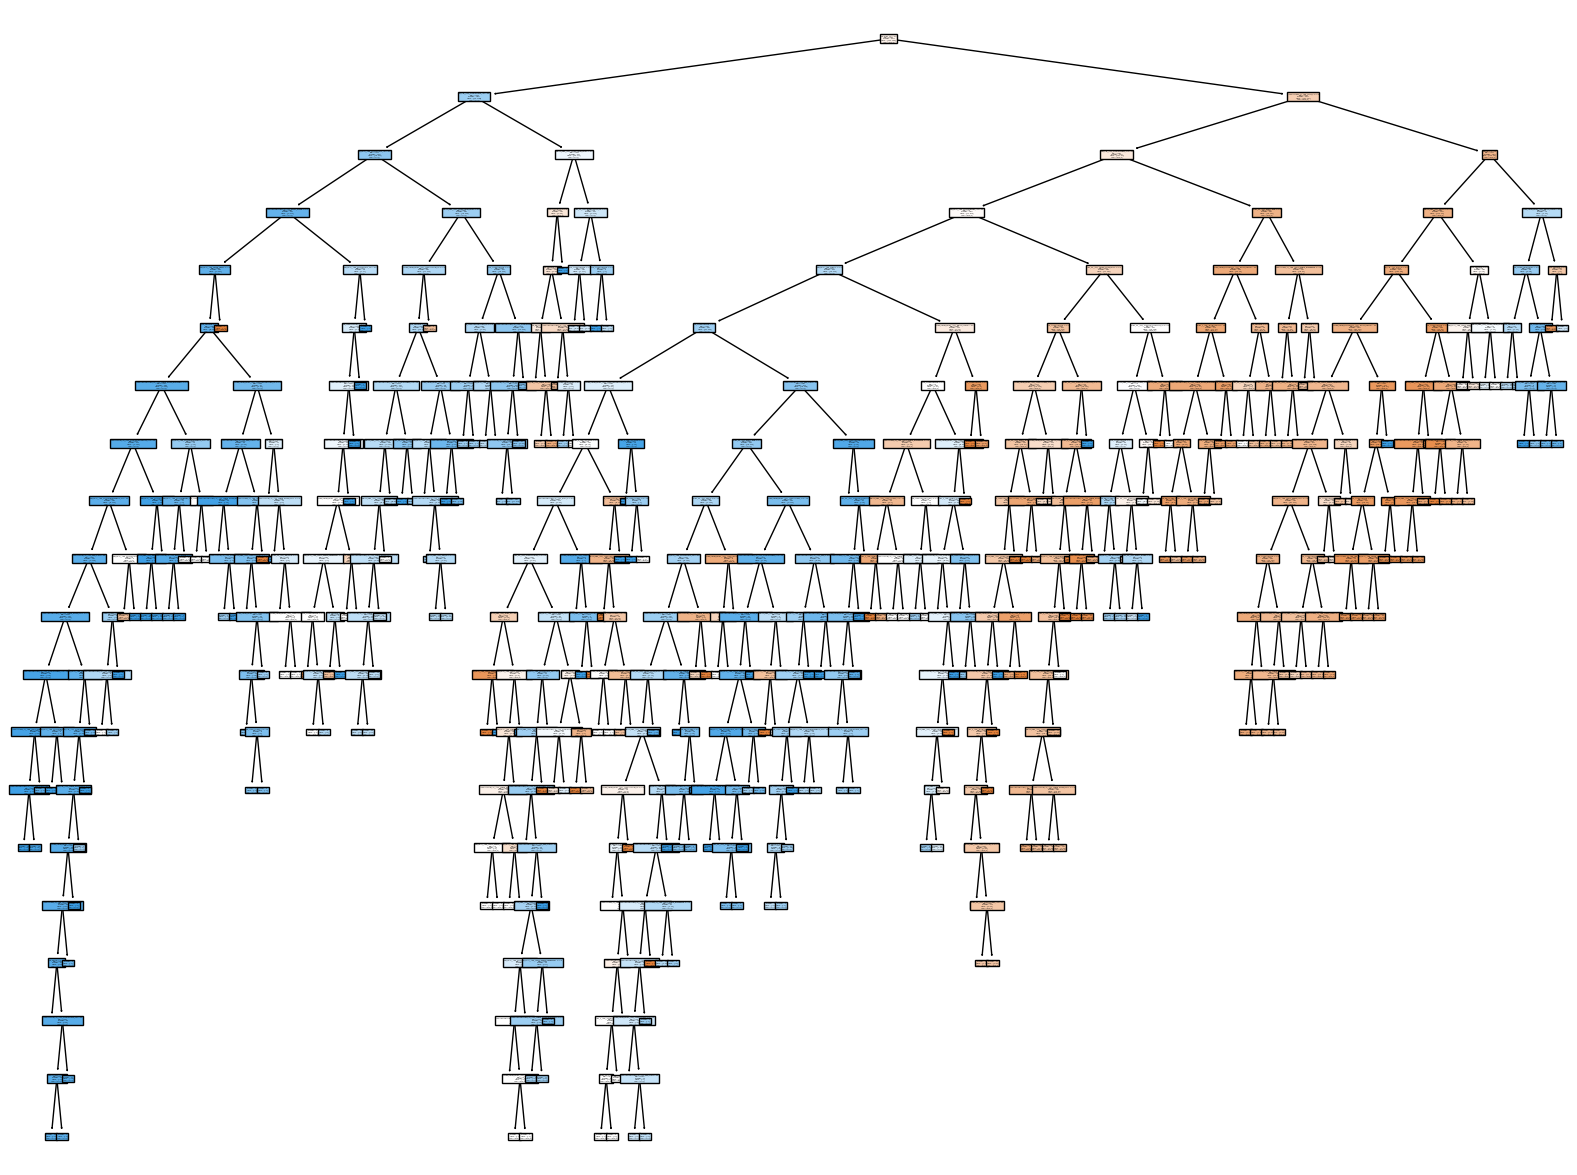

max_depth :  20 , min_samples_leaf :  1 , splitter :  random


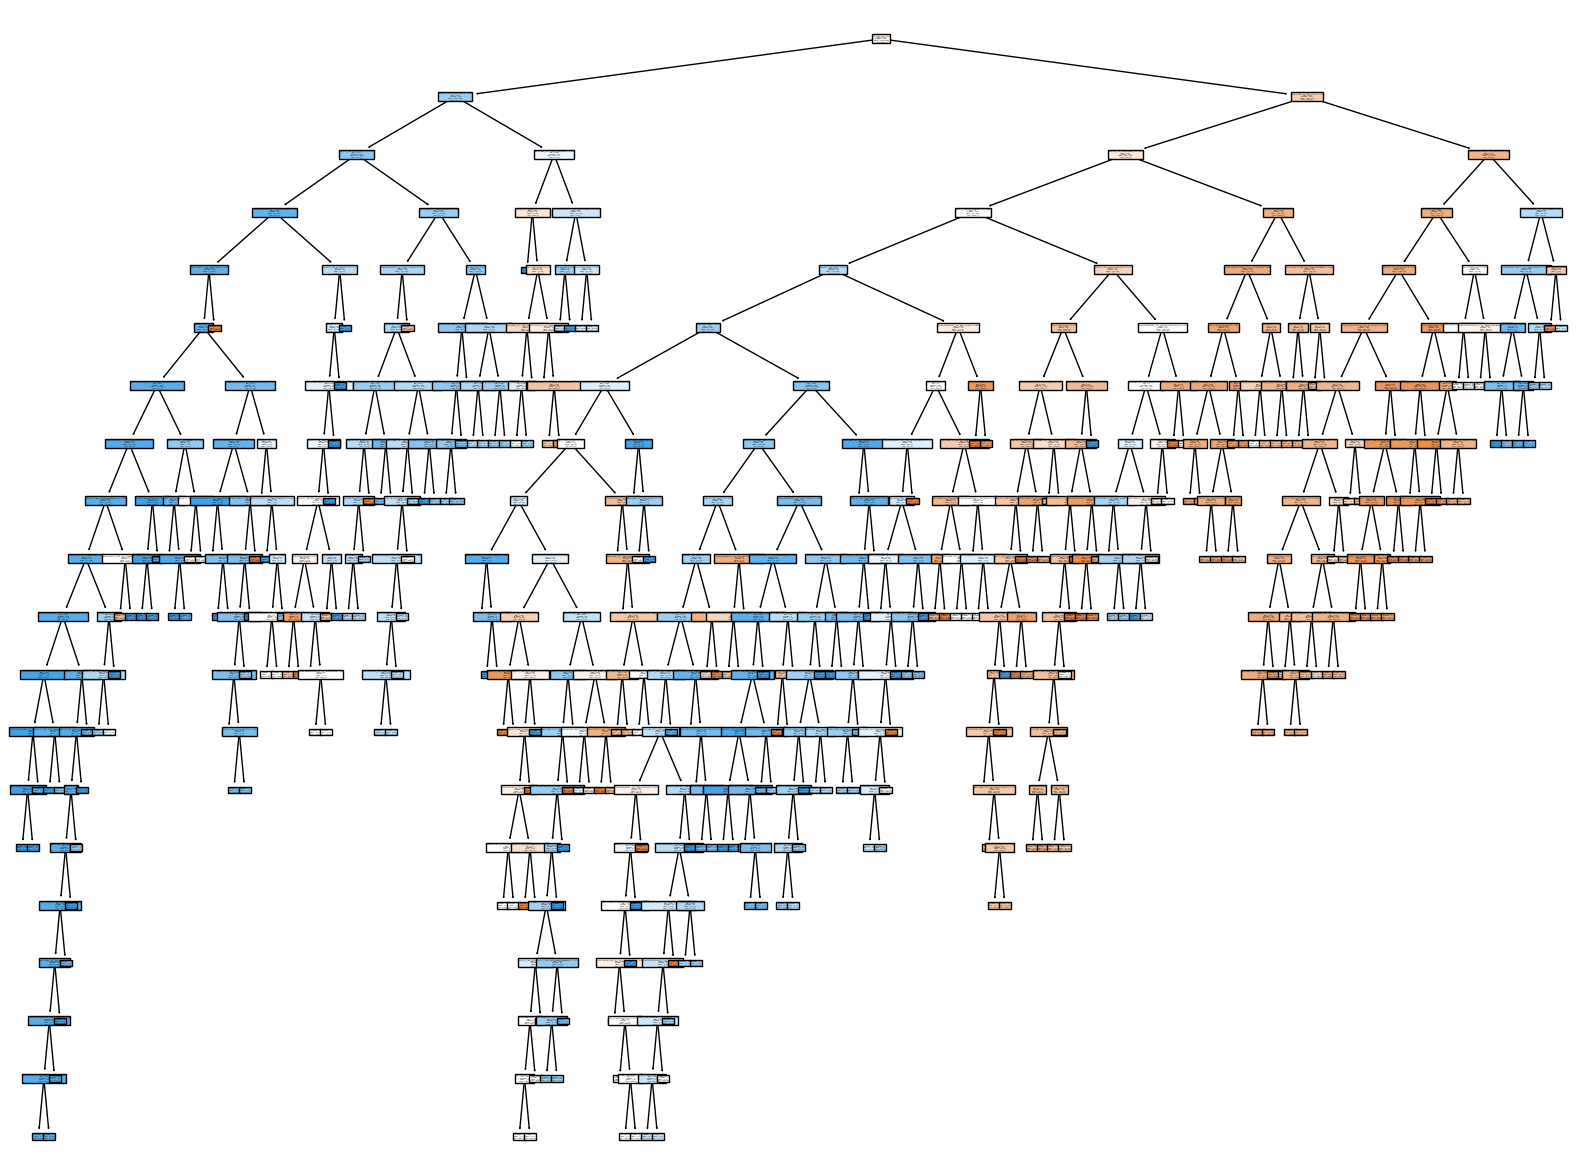

max_depth :  20 , min_samples_leaf :  20 , splitter :  best


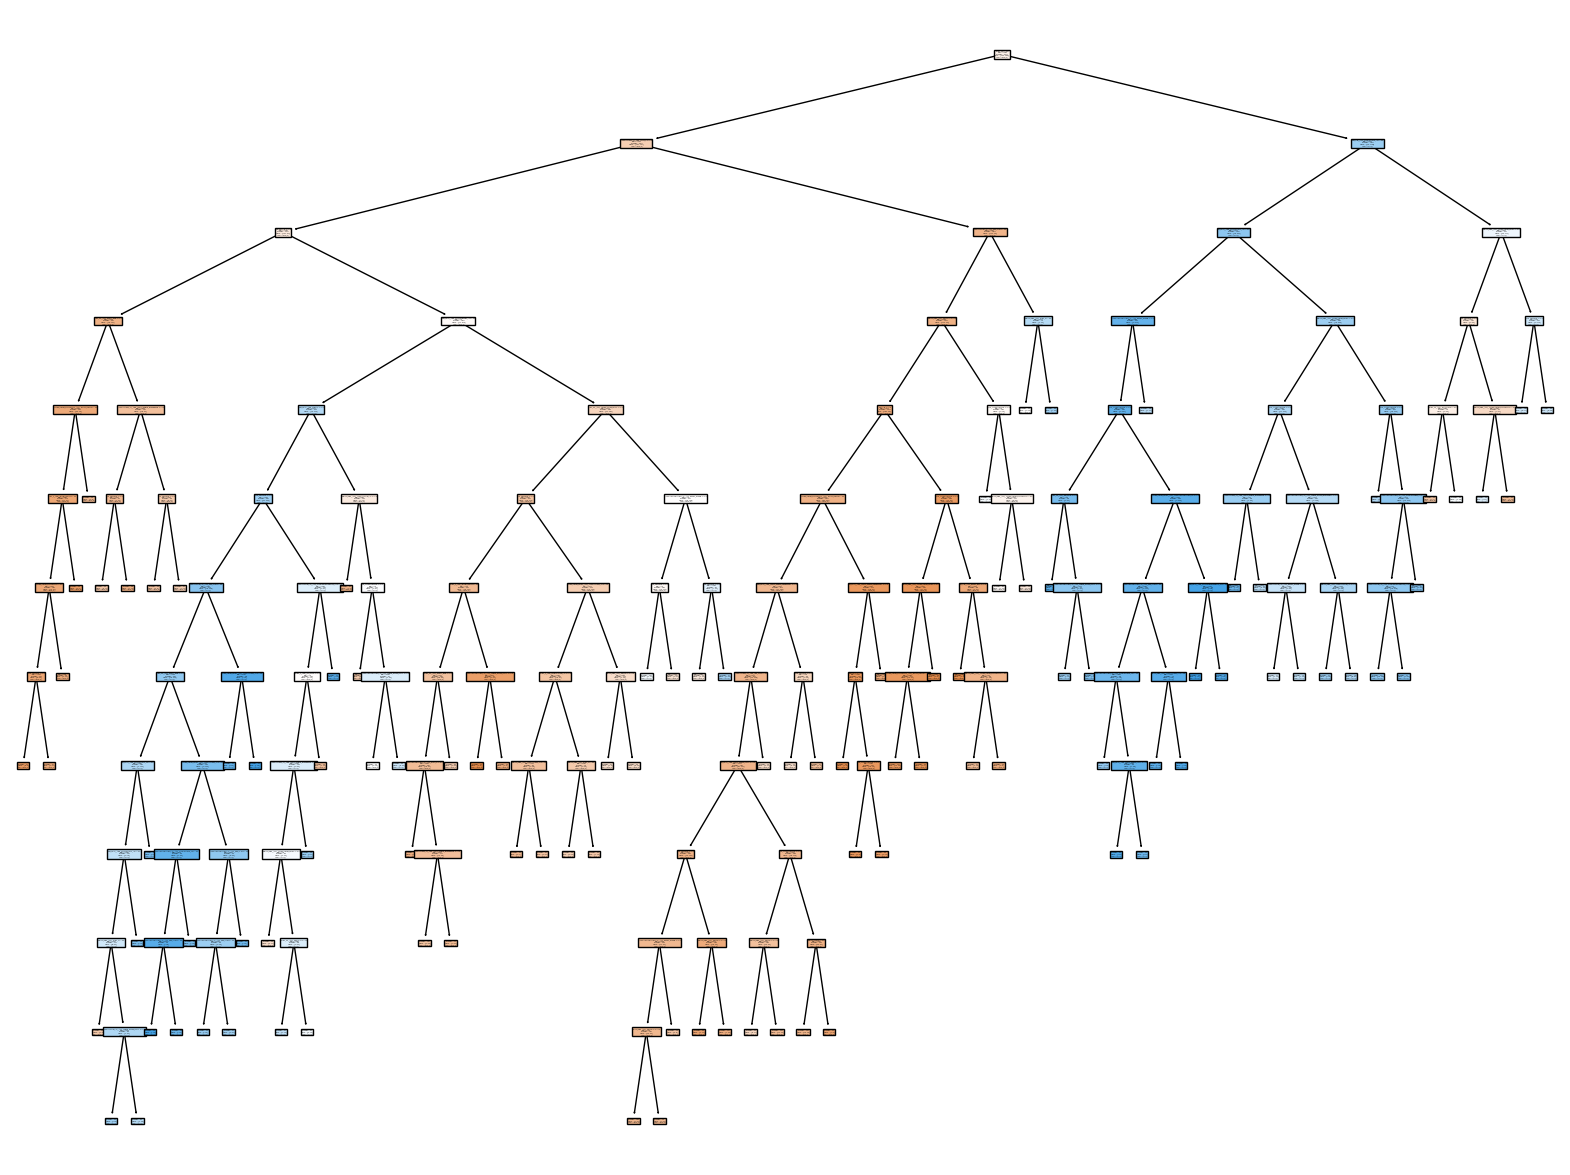

max_depth :  20 , min_samples_leaf :  20 , splitter :  random


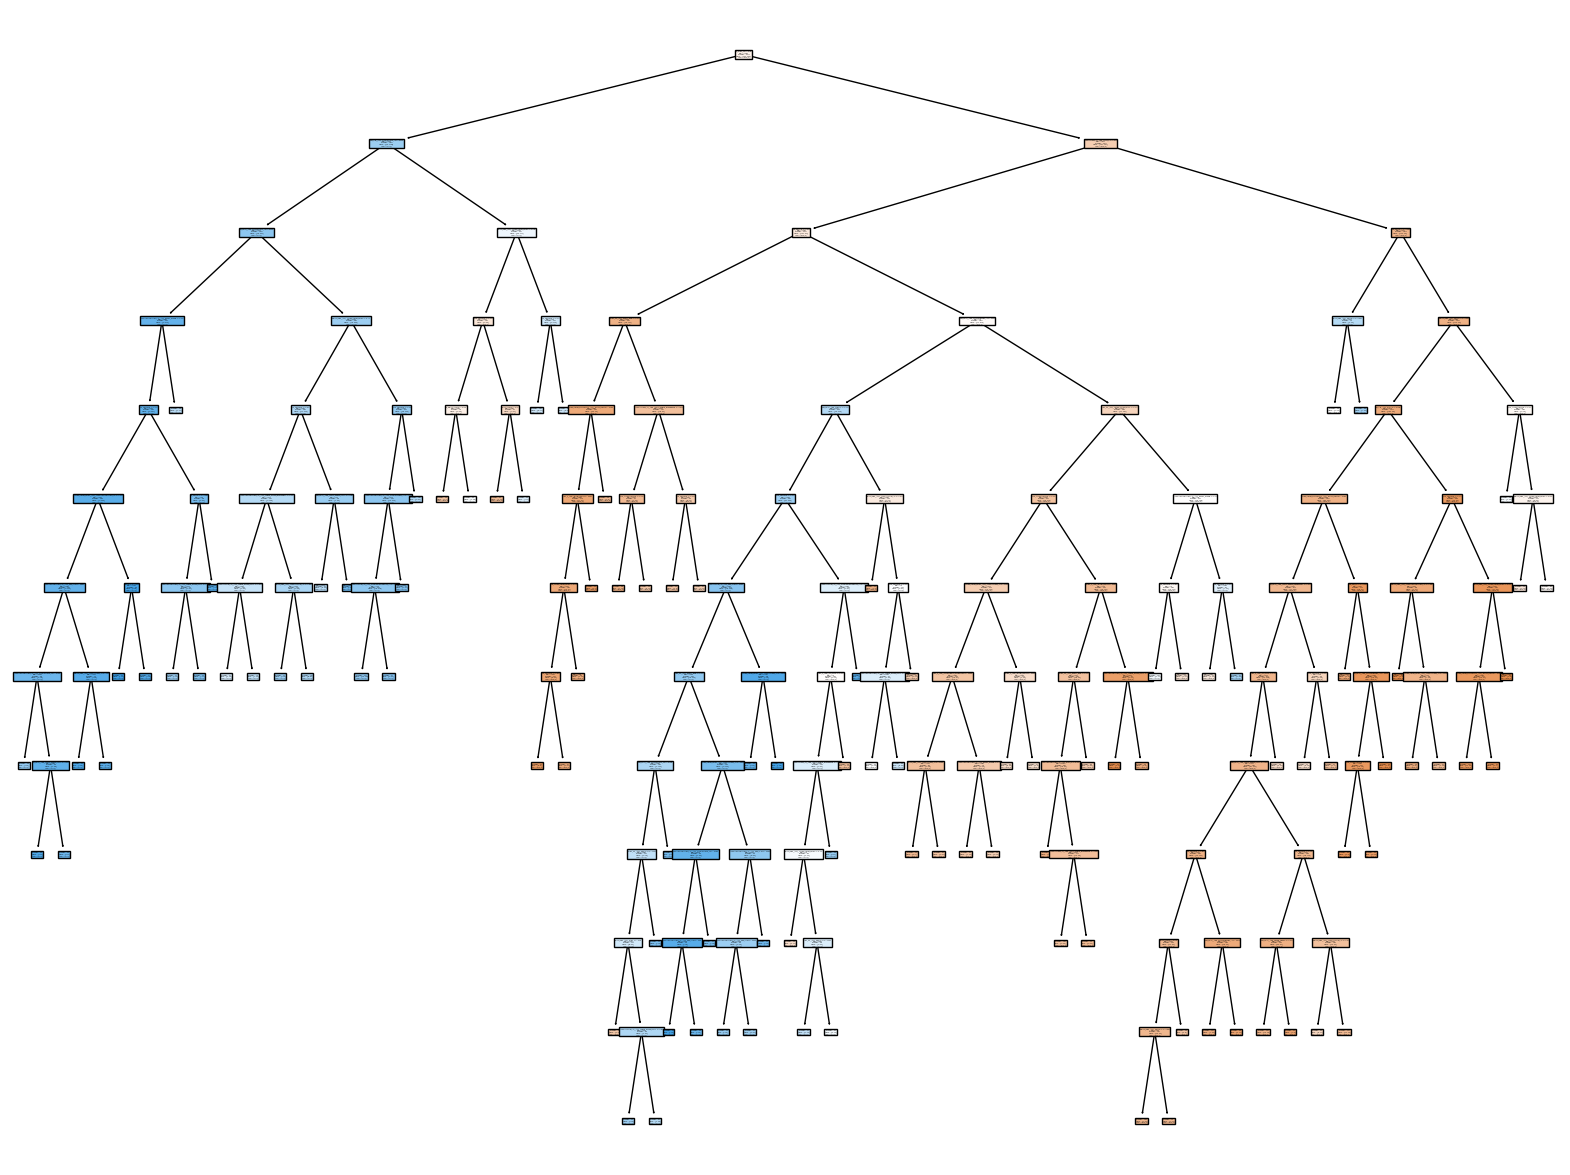

In [46]:
# Build severals decision trees (different parameters) and visualize them

from sklearn import tree
from matplotlib import pyplot as plt 

dictionary = {"max_depth": [8,13,20], "min_samples_leaf": [1,20], "splitter": ["best", "random"]}

for key in dictionary:
    print(key)
    for value in dictionary[key]:
        print("\t",value)

for i in range(len(dictionary["max_depth"])):
    for j in range(len(dictionary["min_samples_leaf"])):
        for k in range(len(dictionary["splitter"])):
            print("max_depth : ", dictionary["max_depth"][i], ", min_samples_leaf : ", dictionary["min_samples_leaf"][j], ", splitter : ", dictionary["splitter"][k])
            clf = tree.DecisionTreeClassifier(max_depth=dictionary["max_depth"][i], min_samples_leaf=dictionary["min_samples_leaf"][j], splitter=dictionary["splitter"][k])
            clf = clf.fit(train_examples, train_labels)
            fig = plt.figure(figsize=(20,15))
            _ = tree.plot_tree(clf,
                                feature_names= features,
                                class_names= ("false (0)", "true (1)" ),
                                filled=True)
            plt.show()


In [47]:
# Run a solid evaluation on different trees (with different parameters) by randomly splitting the data 80% for training and 20% for test *multiple times*

from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dictionary = {"max_depth": [8,20,40], "min_samples_leaf": [1,20], "splitter": ["best", "random"]}
accuracy = []

for key in dictionary:
    print(key)
    for value in dictionary[key]:
        print("\t",value)

for i in range(len(dictionary["max_depth"])):
    for j in range(len(dictionary["min_samples_leaf"])):
        for k in range(len(dictionary["splitter"])):
            print("max_depth : ", dictionary["max_depth"][i], ", min_samples_leaf : ", dictionary["min_samples_leaf"][j], ", splitter : ", dictionary["splitter"][k])
            clf = tree.DecisionTreeClassifier(max_depth=dictionary["max_depth"][i], min_samples_leaf=dictionary["min_samples_leaf"][j], splitter=dictionary["splitter"][k])
            for l in range(10):
                X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2)
                clf = clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                accuracy.append(accuracy_score(y_test, y_pred))
            print("Accuracy : ", np.mean(accuracy))
            accuracy = []

            

max_depth
	 8
	 20
	 40
min_samples_leaf
	 1
	 20
splitter
	 best
	 random
max_depth :  8 , min_samples_leaf :  1 , splitter :  best
Accuracy :  0.6602843601895735
max_depth :  8 , min_samples_leaf :  1 , splitter :  random
Accuracy :  0.6665402843601896
max_depth :  8 , min_samples_leaf :  20 , splitter :  best
Accuracy :  0.6693838862559242
max_depth :  8 , min_samples_leaf :  20 , splitter :  random
Accuracy :  0.6702369668246445
max_depth :  20 , min_samples_leaf :  1 , splitter :  best
Accuracy :  0.6472037914691944
max_depth :  20 , min_samples_leaf :  1 , splitter :  random
Accuracy :  0.6558293838862559
max_depth :  20 , min_samples_leaf :  20 , splitter :  best
Accuracy :  0.6691943127962086
max_depth :  20 , min_samples_leaf :  20 , splitter :  random
Accuracy :  0.667962085308057
max_depth :  40 , min_samples_leaf :  1 , splitter :  best
Accuracy :  0.6543127962085307
max_depth :  40 , min_samples_leaf :  1 , splitter :  random
Accuracy :  0.6527014218009478
max_depth :  40 

In [48]:
# Do again the evaluation using 5-cross-validation
# Evaluate the impact (in terms of accuracy) of the three parameters : maximum depth, splitting criterion, and the minimum sample leafs. 

from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

dictionary = {"max_depth": [8,20,40], "min_samples_leaf": [1,20], "splitter": ["best", "random"]}
accuracy = []

# for key in dictionary:
#     print(key)
#     for value in dictionary[key]:
#         print("\t",value)

for i in range(len(dictionary["max_depth"])):
    for j in range(len(dictionary["min_samples_leaf"])):
        for k in range(len(dictionary["splitter"])):
            print("max_depth : ", dictionary["max_depth"][i], ", min_samples_leaf : ", dictionary["min_samples_leaf"][j], ", splitter : ", dictionary["splitter"][k])
            clf = tree.DecisionTreeClassifier(max_depth=dictionary["max_depth"][i], min_samples_leaf=dictionary["min_samples_leaf"][j], splitter=dictionary["splitter"][k])
            scores = cross_val_score(clf, train_examples, train_labels, cv=5)
            print("Accuracy : ", np.mean(scores))
            accuracy = []
            print()


max_depth :  8 , min_samples_leaf :  1 , splitter :  best
Accuracy :  0.655984424040217

max_depth :  8 , min_samples_leaf :  1 , splitter :  random
Accuracy :  0.6569330107826651

max_depth :  8 , min_samples_leaf :  20 , splitter :  best
Accuracy :  0.6630015198251751

max_depth :  8 , min_samples_leaf :  20 , splitter :  random
Accuracy :  0.6630015198251751

max_depth :  20 , min_samples_leaf :  1 , splitter :  best
Accuracy :  0.647257030315566

max_depth :  20 , min_samples_leaf :  1 , splitter :  random
Accuracy :  0.6466877703535168

max_depth :  20 , min_samples_leaf :  20 , splitter :  best
Accuracy :  0.6645184672248352

max_depth :  20 , min_samples_leaf :  20 , splitter :  random
Accuracy :  0.6645184672248352

max_depth :  40 , min_samples_leaf :  1 , splitter :  best
Accuracy :  0.6468775236741998

max_depth :  40 , min_samples_leaf :  1 , splitter :  random
Accuracy :  0.6470674568558504

max_depth :  40 , min_samples_leaf :  20 , splitter :  best
Accuracy :  0.66451846

max_depth :  8 min_samples_leaf :  1 splitter :  best
Accuracy :  0.6561739974999325
[[2021  769]
 [ 890 1593]]
True positive rate :  0.7243727598566309
False positive rate :  0.2756272401433692
True negative rate :  0.6415626258558196
False negative rate :  0.3584373741441804

max_depth :  8 min_samples_leaf :  1 splitter :  random
Accuracy :  0.6561739974999325
[[2021  769]
 [ 890 1593]]
True positive rate :  0.7243727598566309
False positive rate :  0.2756272401433692
True negative rate :  0.6415626258558196
False negative rate :  0.3584373741441804

max_depth :  8 min_samples_leaf :  20 splitter :  best
Accuracy :  0.6630015198251751
[[1969  821]
 [ 854 1629]]
True positive rate :  0.7057347670250896
False positive rate :  0.2942652329749104
True negative rate :  0.6560612162706404
False negative rate :  0.34393878372935965

max_depth :  8 min_samples_leaf :  20 splitter :  random
Accuracy :  0.6630015198251751
[[1969  821]
 [ 854 1629]]
True positive rate :  0.7057347670250896
Fal

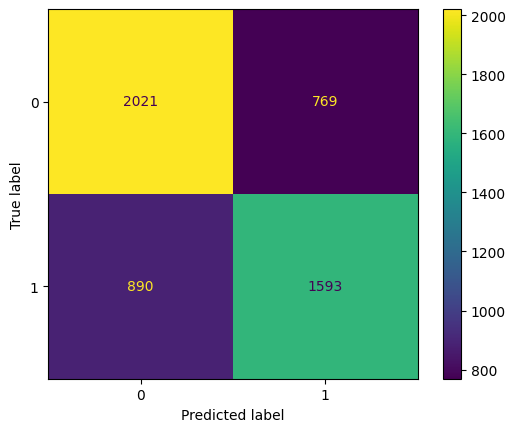

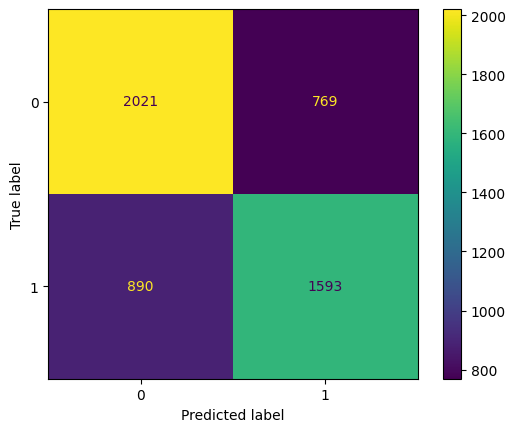

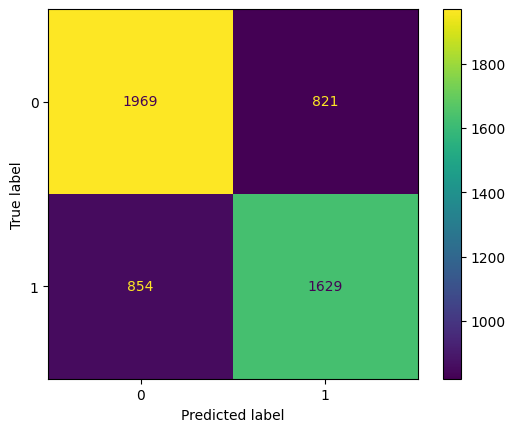

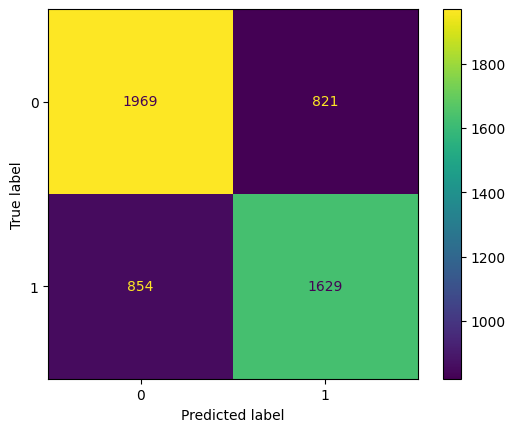

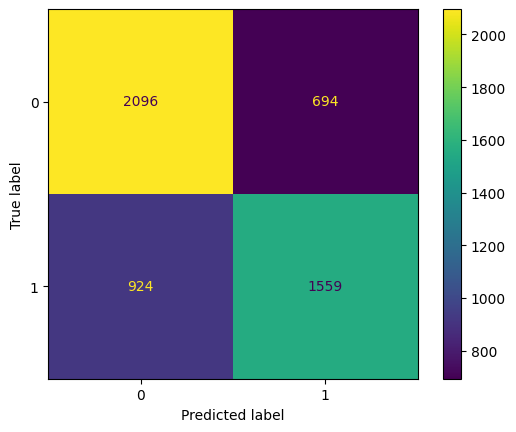

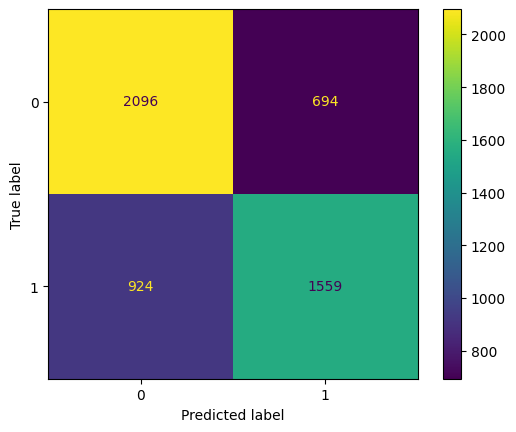

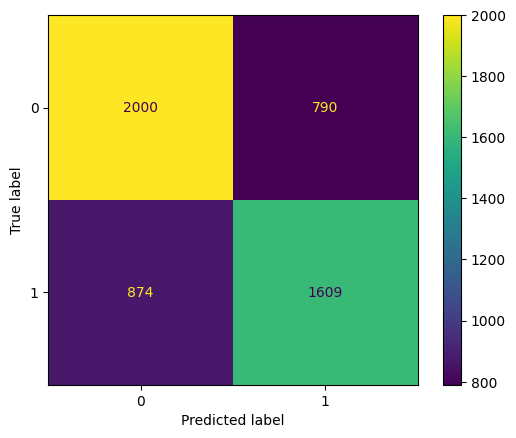

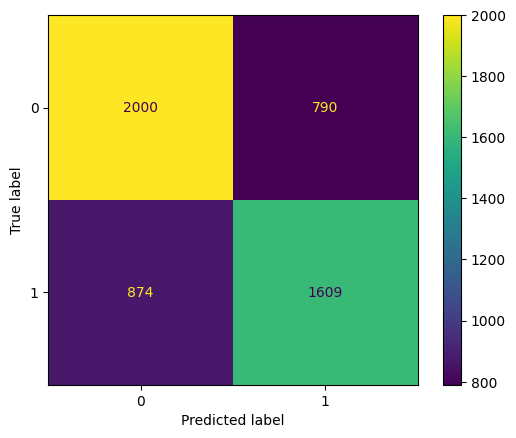

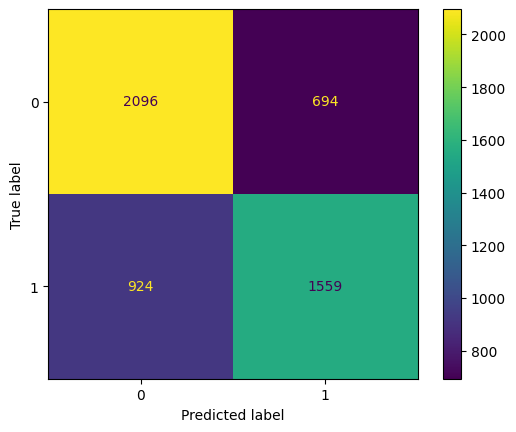

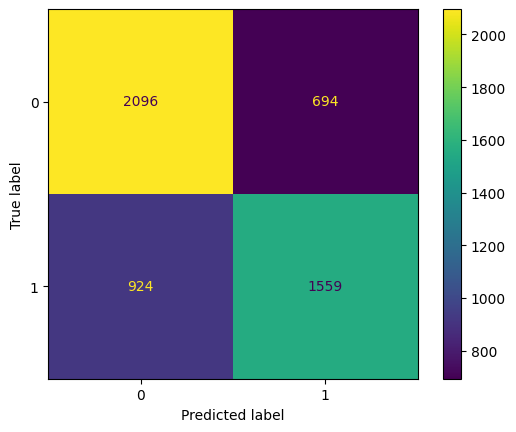

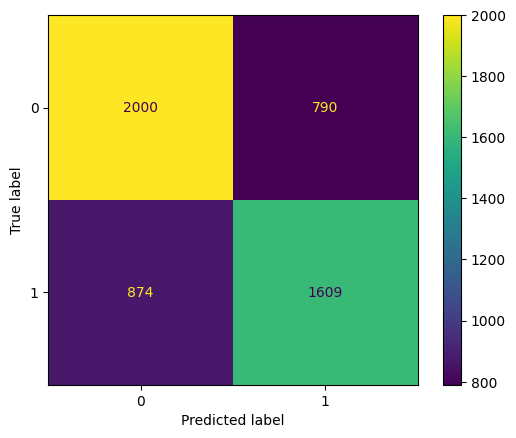

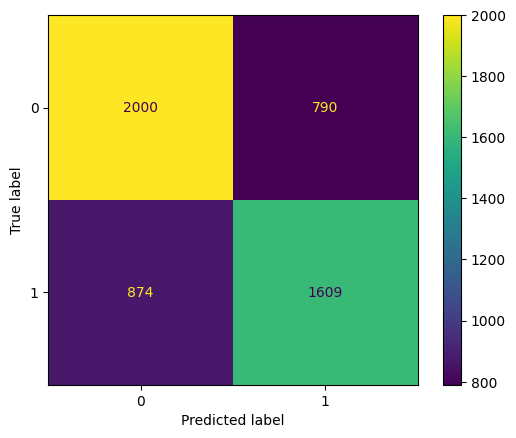

In [49]:
# Study the confusion matrix to evaluate the True/False Positive/Negative Rate. What are the most important parameters? 

from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dictionary = {"max_depth": [8,20,40], "min_samples_leaf": [1,20], "splitter": ["best", "random"]}
accuracy = []

# for key in dictionary:
#     print(key)
#     for value in dictionary[key]:

for i in range(len(dictionary["max_depth"])):
    for j in range(len(dictionary["min_samples_leaf"])):
        for k in range(len(dictionary["splitter"])):
            print("max_depth : ", dictionary["max_depth"][i], "min_samples_leaf : ", dictionary["min_samples_leaf"][j], "splitter : ", dictionary["splitter"][k])
            clf = tree.DecisionTreeClassifier(max_depth=dictionary["max_depth"][i], min_samples_leaf=dictionary["min_samples_leaf"][j], splitter=dictionary["splitter"][k])
            scores = cross_val_score(clf, train_examples, train_labels, cv=5)
            print("Accuracy : ", np.mean(scores))
            accuracy = []
            clf = clf.fit(train_examples, train_labels)
            y_pred = clf.predict(train_examples)
            cm = confusion_matrix(train_labels, y_pred)
            print(cm)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=clf.classes_)
            disp.plot()
            print("True positive rate : ", cm[0][0]/(cm[0][0]+cm[0][1]))
            print("False positive rate : ", cm[0][1]/(cm[0][0]+cm[0][1]))
            print("True negative rate : ", cm[1][1]/(cm[1][0]+cm[1][1]))
            print("False negative rate : ", cm[1][0]/(cm[1][0]+cm[1][1]))
            print()

# What are the most important parameters ?
# >> max_depth, min_samples_leaf, splitter


In [50]:
#Propose a way to assess whether the algorithm is fair to a particular ethnic group.

# A way to assess whether the algorithm is fair to a particular ethnic group is to check if we split according to every "race"